<a href="https://colab.research.google.com/github/julianl11/projektarbeit_1/blob/main/pytorch_course/04_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cpu'

In [ ]:
import requests
from pathlib import Path
import zipfile

data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    print(f"{image_path} directory created.")

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
data/pizza_steak_sushi directory created.
Unzipping pizza, steak, sushi data...


In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
import os

def walk_through_dir(dir_path):
  """Walks through dir returning its contents."""
  print(f"dir_path = {dir_path}")
  for dirpath, dirnames, filenames in os.walk(dir_path):
    # print(f"dirnames: {dirnames}")
    # print(f"filenames: {filenames}")
    # print(f"dirpath: {dirpath}")
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

dir_path = data/pizza_steak_sushi
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [ ]:
print(f"image_path: {image_path}")
train_dir = image_path / "train"
test_dir = image_path / "test"

image_path: data/pizza_steak_sushi


# lable is the folder name

In [ ]:
type(image_path)

pathlib.PosixPath

# Visualize Data

1. Get image paths
2. pick random.choice()
3. get image class name `pathlib.Path.parent.stem`
4. Images in python -> PIL
5. Print image + metadata                                          

In [ ]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
len(image_path_list)

300

In [ ]:
random_image_path = random.choice(image_path_list)
random_image_class = random_image_path.parent.stem
print(f"random_image_path: {random_image_path}")
print(f"random_image_class: {random_image_class}")
print(f"image heigth: {Image.open(random_image_path).height}")
print(f"image width: {Image.open(random_image_path).width}")

random_image_path: data/pizza_steak_sushi/test/pizza/2871261.jpg
random_image_class: pizza
image heigth: 384
image width: 512


In [ ]:
Image.open(random_image_path).size

(512, 384)

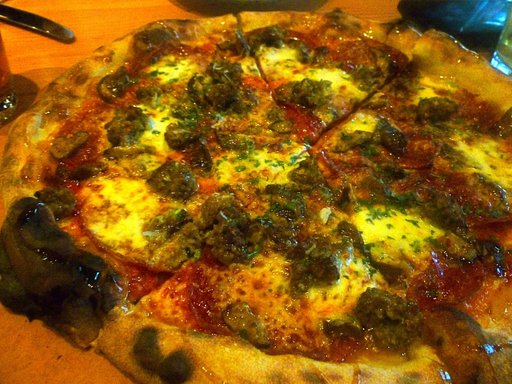

In [ ]:
img = Image.open(random_image_path)
img

In [ ]:
import numpy as np
from PIL import Image

img_as_array = np.asarray(img)
print(img_as_array.shape)

(384, 512, 3)


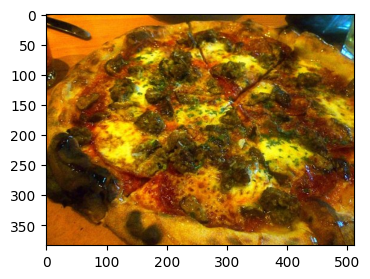

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.imshow(img_as_array)

In [ ]:
img_as_array.__len__(), img_as_array[0].__len__(), img_as_array[0][0].__len__(), img_as_array.shape

(384, 512, 3, (384, 512, 3))

## Dataset -> Dataloader

In [ ]:
!pip install --pre torchvision -f https://download.pytorch.org/whl/nightly/cu124/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu124/torch_nightly.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [ ]:
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

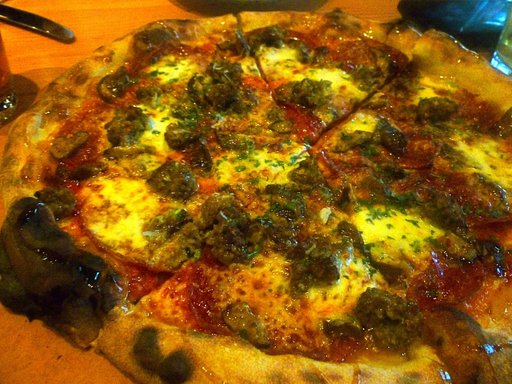

In [ ]:
img

In [ ]:
data_transform(img).shape, data_transform(img).dtype

(torch.Size([3, 64, 64]), torch.float32)

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=42):
  """
  Selects random image from path -> transform -> plot original and transformed image
  """
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      plt.figure(figsize=(4, 3))
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.tight_layout()
      plt.show()


<Figure size 400x300 with 0 Axes>

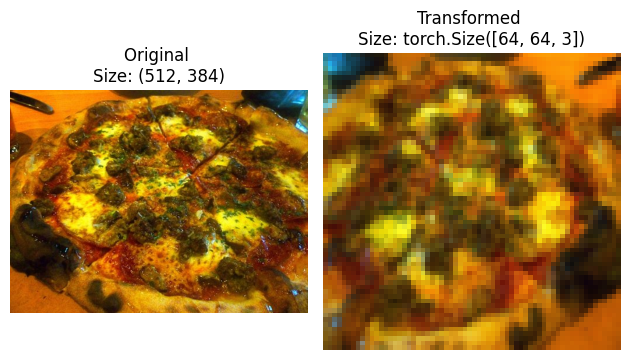

<Figure size 400x300 with 0 Axes>

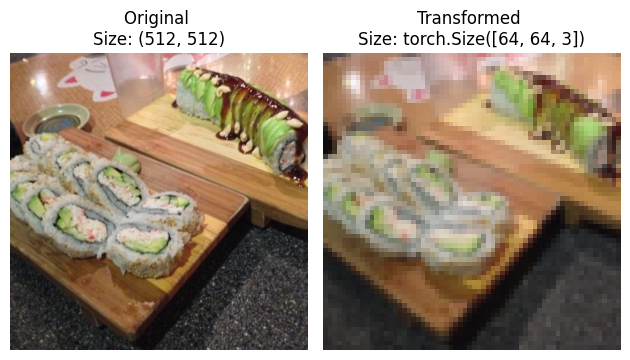

<Figure size 400x300 with 0 Axes>

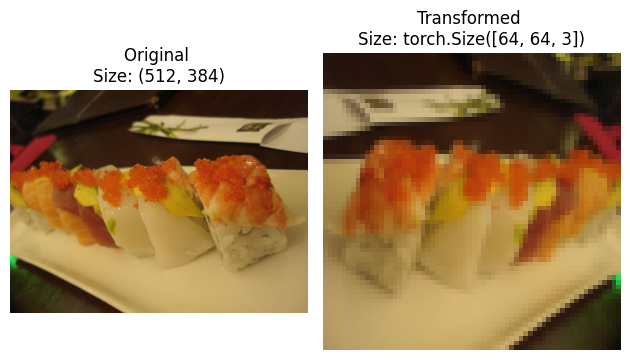

In [ ]:
plot_transformed_images(image_path_list, data_transform)

In [ ]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

In [ ]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [ ]:
class_names = train_data.classes
class_names_dict = train_data.class_to_idx
class_names_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
train_data.samples[:3]

[('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1033251.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1044789.jpg', 0)]

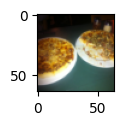

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(train_data[0][0].permute(1,2,0))

In [ ]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=16, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=16,num_workers=os.cpu_count(), shuffle=False)

In [ ]:
next(train_dataloader.__iter__())[0].shape

torch.Size([16, 3, 64, 64])

In [ ]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([16, 3, 64, 64]), torch.Size([16]))

In [ ]:
import os
from PIL import Image
import pathlib
from torch.utils.data import Dataset
from typing import Tuple, Dict, List
import torchvision
from torch.utils.data import DataLoader

In [ ]:
# instances of Imagefolder
isinstance(train_data, Dataset), isinstance(train_data, DataLoader), type(train_data), train_data.classes, train_data.class_to_idx

(True,
 False,
 torchvision.datasets.folder.ImageFolder,
 ['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print(f"Target directory: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir()])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory: str) -> Tuple[[List[str]], Dict[str, int]]:
  """Finds the class folder names in target dir"""

  target_directory = directory
  #print(f"Target directory: {target_directory}")

  class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir()])
  if not class_names_found:
    raise FileNotFoundError(f"No class folder found in {target_directory}")
  else:
    pass
    #print(f"Class names found: {class_names_found}")

  class_to_idx = {class_name: i for i, class_name in enumerate(class_names_found)}
  return class_names_found, class_to_idx

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
from torch.utils.data import Dataset
import pandas as pd


class ImageFolderCustom(Dataset):

  def __init__(self,
               target_dir: str,
               transform=None,):

    self.image_dir = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.image_transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)

  def load_image(self, index: int) -> Image.Image:
    """Opens Image via provided path."""
    image_path = self.image_dir[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    """Returns the total number of samples."""
    return len(self.image_dir)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """
    Returns one sample of data, data and label(class) -> (X,y)
    """
    image = self.load_image(index)
    class_name = self.image_dir[index].parent.stem
    class_idx = self.class_to_idx[class_name]

    if self.image_transform:
      return self.image_transform(image), class_idx
    else:
      return image, class_idx

In [ ]:
print(train_data, type(train_data))
img, label = train_data[0]
img.shape, label

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) <class 'torchvision.datasets.folder.ImageFolder'>


(torch.Size([3, 64, 64]), 0)

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(train_dir, train_transforms)

In [ ]:
test_data_custom = ImageFolderCustom(test_dir, test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7a442aa2ae10>,
 <__main__.ImageFolderCustom at 0x7a442aa6bf90>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
train_data_custom[0][0].shape, train_data_custom[0][1]

(torch.Size([3, 64, 64]), 2)